In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from glob import glob
import os
import seaborn as sns
import xarray as xr

import matplotlib.pyplot as plt

sns.set(font="Helvetica")

seas = 'mam'

In [2]:
diri = r'/Users/fadhlilrizki/Documents/PhD/thesis/dataout/'
diro = r'/Users/fadhlilrizki/Documents/PhD/thesis/figures/stats/'

In [3]:
ds_TE = xr.open_dataset(diri+"combined_wave_extreme_EastCoast_"+seas+".nc")
ds_TE

<xarray.Dataset>
Dimensions:    (list: 50, ncl1: 50)
Dimensions without coordinates: list, ncl1
Data variables:
    composite  (list) float32 ...
    median     (ncl1) float32 ...
    alpha      (list) float32 ...

In [4]:
combination = ["er_er_drydry",
               "er_er_wet_wet",
               
               "er_klv_drydry",
               "er_klv_drywet",
               "er_klv_wetdry",
               "er_klv_wetwet",
               
               "er_mjo_drydry",
               "er_mjo_drywet",
               "er_mjo_wetdry",
               "er_mjo_wetwet",
               
               "er_mrg_drydry",
               "er_mrg_drywet",
               "er_mrg_wetdry",
               "er_mrg_wetwet",
               
               "er_td_drydry",
               "er_td_drywet",
               "er_td_wetdry",
               "er_td_wetwet",
               
               "klv_klv_drydry",
               "klv_klv_wet_wet",
               
               "mjo_klv_drydry",
               "mjo_klv_drywet",
               "mjo_klv_wetdry",
               "mjo_klv_wetwet",
               
               "mjo_mjo_drydry",
               "mjo_mjo_wetwet",   
               
               "mrg_klv_drydry",
               "mrg_klv_drywet",
               "mrg_klv_wetdry",
               "mrg_klv_wetwet",
               
               "mrg_mjo_drydry",
               "mrg_mjo_drywet",
               "mrg_mjo_wetdry",
               "mrg_mjo_wetwet",
               
               "mrg_mrg_drydry",
               "mrg_mrg_wetwet",
               
               "mrg_td_drydry",
               "mrg_td_drywet",
               "mrg_td_wetdry",
               "mrg_td_wetwet",
               
               'td_klv_drydry',
               'td_klv_drywet',
               'td_klv_wetdry',
               'td_klv_wetwet',
               
               'td_mjo_drydry',
               'td_mjo_drywet',
               'td_mjo_wetdry',
               'td_mjo_wetwet',
               
               'td_td_drydry',
               'td_td_wetwet',
               
              ]

len(combination)

50

In [5]:
c = ds_TE["composite"]
a = ds_TE["alpha"]
ndays = ds_TE["composite"].attrs["ndays"]
ndays
# attrs["ndays"]

array([1053,  502,  267,   79,  131,   33,  322,  213,  167,   90,  248,
         72,  120,   40,  154,  248,   80,  130,  743,  225,  214,   62,
        155,   36,  900,  532,  158,   56,   54,   15,  195,  134,   55,
         41,  650,  200,   77,  186,   29,   49,   87,   33,  157,   46,
        124,   75,  187,  148,  397,  663], dtype=int32)

In [6]:
cols = ["er-wet", "klv-wet", "mjo-wet", "mrg-wet", "td-wet", "er-dry", "klv-dry", "mjo-dry", "mrg-dry", "td-dry"]

In [7]:
rows = cols


In [8]:
df = []
counter = 0
for i in combination:
    val = c.values[counter]
    df.append(val)
    counter+=1
    
df = pd.DataFrame([df,combination]).transpose()
df = df.rename(columns={0:"prec",1:"combination"})

df["prec"] = df["prec"].astype(float)
df["prec"]

0     0.645563
1     1.315449
2     0.727424
3     0.737553
4     1.186090
5     1.177104
6     0.301587
7     1.094210
8     0.697804
9     3.021235
10    0.234946
11    0.809259
12    1.294815
13    1.942222
14    0.378355
15    1.096416
16    1.213889
17    2.539829
18    0.575086
19    0.949531
20    0.363032
21    0.939785
22    1.378351
23    1.618518
24    0.539506
25    1.533333
26    0.614627
27    0.000000
28    0.719342
29    1.294815
30    0.099601
31    1.159536
32    1.059394
33    2.368564
34    0.537846
35    1.262444
36    0.252237
37    0.730944
38    2.009195
39    1.981859
40    0.446488
41    0.000000
42    0.989667
43    1.688889
44    0.469892
45    0.776889
46    1.142484
47    2.493393
48    0.587070
49    1.494017
Name: prec, dtype: float64

In [9]:
df_a = []
counter = 0
for i in combination:
    val = a.values[counter]
    df_a.append(val)
    counter+=1
    
df_a = pd.DataFrame([df_a,combination]).transpose()
df_a = df_a.rename(columns={0:"alpha",1:"combination"})

df_a["alpha"] = df_a["alpha"].astype(float)
df_a["alpha"]

0     1.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     1.0
7     0.0
8     0.0
9     1.0
10    1.0
11    0.0
12    0.0
13    0.0
14    1.0
15    0.0
16    0.0
17    1.0
18    1.0
19    0.0
20    1.0
21    0.0
22    0.0
23    0.0
24    1.0
25    1.0
26    0.0
27    1.0
28    0.0
29    0.0
30    1.0
31    0.0
32    0.0
33    1.0
34    1.0
35    0.0
36    1.0
37    0.0
38    0.0
39    0.0
40    0.0
41    1.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    1.0
48    1.0
49    1.0
Name: alpha, dtype: float64

In [10]:
df_n = []
counter = 0
for i in combination:
    val = ndays[counter]
    df_n.append(val)
    counter+=1
    
df_n = pd.DataFrame([df_n,combination]).transpose()
df_n = df_n.rename(columns={0:"ndays",1:"combination"})

df_n["ndays"] = df_n["ndays"].astype(float)
df_n

,ndays,combination
0,1053.0,er_er_drydry
1,502.0,er_er_wet_wet
2,267.0,er_klv_drydry
3,79.0,er_klv_drywet
4,131.0,er_klv_wetdry
5,33.0,er_klv_wetwet
6,322.0,er_mjo_drydry
7,213.0,er_mjo_drywet
8,167.0,er_mjo_wetdry
9,90.0,er_mjo_wetwet


In [11]:
# df["prec"] = [df["prec"].iloc[i].astype(float) for i in range(len(df["prec"]))]

In [12]:
x = pd.DataFrame(columns=cols, index=rows)
a = pd.DataFrame(columns=cols, index=rows)
n = pd.DataFrame(columns=cols, index=rows)

In [13]:

x.loc["er-dry","er-dry"] = df["prec"].loc[0].astype(float)
x.loc["er-wet","er-wet"] = df["prec"].loc[1].astype(float)

#erklv
x.loc["er-dry","klv-dry"] = df["prec"].loc[2].astype(float)
x.loc["er-dry","klv-wet"] = df["prec"].loc[3].astype(float)
x.loc["er-wet","klv-dry"] = df["prec"].loc[4].astype(float)
x.loc["er-wet","klv-wet"] = df["prec"].loc[5].astype(float)

x.loc["klv-dry","er-dry"] = df["prec"].loc[2].astype(float)
x.loc["klv-wet","er-dry"] = df["prec"].loc[3].astype(float)
x.loc["klv-dry","er-wet"] = df["prec"].loc[4].astype(float)
x.loc["klv-wet","er-wet"] = df["prec"].loc[5].astype(float)

#ermjo
x.loc["er-dry","mjo-dry"] = df["prec"].loc[6].astype(float)
x.loc["er-dry","mjo-wet"] = df["prec"].loc[7].astype(float)
x.loc["er-wet","mjo-dry"] = df["prec"].loc[8].astype(float)
x.loc["er-wet","mjo-wet"] = df["prec"].loc[9].astype(float)

x.loc["mjo-dry","er-dry"] = df["prec"].loc[6].astype(float)
x.loc["mjo-wet","er-dry"] = df["prec"].loc[7].astype(float)
x.loc["mjo-dry","er-wet"] = df["prec"].loc[8].astype(float)
x.loc["mjo-wet","er-wet"] = df["prec"].loc[9].astype(float)

#ermrg
x.loc["er-dry","mrg-dry"] = df["prec"].loc[10].astype(float)
x.loc["er-dry","mrg-wet"] = df["prec"].loc[11].astype(float)
x.loc["er-wet","mrg-dry"] = df["prec"].loc[12].astype(float)
x.loc["er-wet","mrg-wet"] = df["prec"].loc[13].astype(float)

x.loc["mrg-dry","er-dry"] = df["prec"].loc[10].astype(float)
x.loc["mrg-wet","er-dry"] = df["prec"].loc[11].astype(float)
x.loc["mrg-dry","er-wet"] = df["prec"].loc[12].astype(float)
x.loc["mrg-wet","er-wet"] = df["prec"].loc[13].astype(float)

#ertd
x.loc["er-dry","td-dry"] = df["prec"].loc[14].astype(float)
x.loc["er-dry","td-wet"] = df["prec"].loc[15].astype(float)
x.loc["er-wet","td-dry"] = df["prec"].loc[16].astype(float)
x.loc["er-wet","td-wet"] = df["prec"].loc[17].astype(float)

x.loc["td-dry","er-dry"] = df["prec"].loc[14].astype(float)
x.loc["td-wet","er-dry"] = df["prec"].loc[15].astype(float)
x.loc["td-dry","er-wet"] = df["prec"].loc[16].astype(float)
x.loc["td-wet","er-wet"] = df["prec"].loc[17].astype(float)


#klvklv
x.loc["klv-dry","klv-dry"] = df["prec"].loc[18].astype(float)
x.loc["klv-wet","klv-wet"] = df["prec"].loc[19].astype(float)

#mjoklv
x.loc["mjo-dry","klv-dry"] = df["prec"].loc[20].astype(float)
x.loc["mjo-dry","klv-wet"] = df["prec"].loc[21].astype(float)
x.loc["mjo-wet","klv-dry"] = df["prec"].loc[22].astype(float)
x.loc["mjo-wet","klv-wet"] = df["prec"].loc[23].astype(float)

x.loc["klv-dry","mjo-dry"] = df["prec"].loc[20].astype(float)
x.loc["klv-wet","mjo-dry"] = df["prec"].loc[21].astype(float)
x.loc["klv-dry","mjo-wet"] = df["prec"].loc[22].astype(float)
x.loc["klv-wet","mjo-wet"] = df["prec"].loc[23].astype(float)

#mjomjo
x.loc["mjo-dry","mjo-dry"] = df["prec"].loc[24].astype(float)
x.loc["mjo-wet","mjo-wet"] = df["prec"].loc[25].astype(float)

#mrgklv
x.loc["mrg-dry","klv-dry"] = df["prec"].loc[26].astype(float)
x.loc["mrg-dry","klv-wet"] = df["prec"].loc[27].astype(float)
x.loc["mrg-wet","klv-dry"] = df["prec"].loc[28].astype(float)
x.loc["mrg-wet","klv-wet"] = df["prec"].loc[29].astype(float)

x.loc["klv-dry","mrg-dry"] = df["prec"].loc[26].astype(float)
x.loc["klv-wet","mrg-dry"] = df["prec"].loc[27].astype(float)
x.loc["klv-dry","mrg-wet"] = df["prec"].loc[28].astype(float)
x.loc["klv-wet","mrg-wet"] = df["prec"].loc[29].astype(float)

#mrgmjo
x.loc["mrg-dry","mjo-dry"] = df["prec"].loc[30].astype(float)
x.loc["mrg-dry","mjo-wet"] = df["prec"].loc[31].astype(float)
x.loc["mrg-wet","mjo-dry"] = df["prec"].loc[32].astype(float)
x.loc["mrg-wet","mjo-wet"] = df["prec"].loc[33].astype(float)

x.loc["mjo-dry","mrg-dry"] = df["prec"].loc[30].astype(float)
x.loc["mjo-wet","mrg-dry"] = df["prec"].loc[31].astype(float)
x.loc["mjo-dry","mrg-wet"] = df["prec"].loc[32].astype(float)
x.loc["mjo-wet","mrg-wet"] = df["prec"].loc[33].astype(float)

#mrgmrg
x.loc["mrg-dry","mrg-dry"] = df["prec"].loc[34].astype(float)
x.loc["mrg-wet","mrg-wet"] = df["prec"].loc[35].astype(float)

#mrgtd
x.loc["mrg-dry","td-dry"] = df["prec"].loc[36].astype(float)
x.loc["mrg-dry","td-wet"] = df["prec"].loc[37].astype(float)
x.loc["mrg-wet","td-dry"] = df["prec"].loc[38].astype(float)
x.loc["mrg-wet","td-wet"] = df["prec"].loc[39].astype(float)

x.loc["td-dry","mrg-dry"] = df["prec"].loc[36].astype(float)
x.loc["td-wet","mrg-dry"] = df["prec"].loc[37].astype(float)
x.loc["td-dry","mrg-wet"] = df["prec"].loc[38].astype(float)
x.loc["td-wet","mrg-wet"] = df["prec"].loc[39].astype(float)

#tdklv
x.loc["td-dry","klv-dry"] = df["prec"].loc[40].astype(float)
x.loc["td-dry","klv-wet"] = df["prec"].loc[41].astype(float)
x.loc["td-wet","klv-dry"] = df["prec"].loc[42].astype(float)
x.loc["td-wet","klv-wet"] = df["prec"].loc[43].astype(float)

x.loc["klv-dry","td-dry"] = df["prec"].loc[40].astype(float)
x.loc["klv-wet","td-dry"] = df["prec"].loc[41].astype(float)
x.loc["klv-dry","td-wet"] = df["prec"].loc[42].astype(float)
x.loc["klv-wet","td-wet"] = df["prec"].loc[43].astype(float)

#tdmjo
x.loc["td-dry","mjo-dry"] = df["prec"].loc[44].astype(float)
x.loc["td-dry","mjo-wet"] = df["prec"].loc[45].astype(float)
x.loc["td-wet","mjo-dry"] = df["prec"].loc[46].astype(float)
x.loc["td-wet","mjo-wet"] = df["prec"].loc[47].astype(float)

x.loc["mjo-dry","td-dry"] = df["prec"].loc[44].astype(float)
x.loc["mjo-wet","td-dry"] = df["prec"].loc[45].astype(float)
x.loc["mjo-dry","td-wet"] = df["prec"].loc[46].astype(float)
x.loc["mjo-wet","td-wet"] = df["prec"].loc[47].astype(float)

#tdtd
x.loc["td-dry","td-dry"] = df["prec"].loc[48].astype(float)
x.loc["td-wet","td-wet"] = df["prec"].loc[49].astype(float)

In [14]:

a.loc["er-dry","er-dry"] = df_a["alpha"].loc[0].astype(float)
a.loc["er-wet","er-wet"] = df_a["alpha"].loc[1].astype(float)

#erklv
a.loc["er-dry","klv-dry"] = df_a["alpha"].loc[2].astype(float)
a.loc["er-dry","klv-wet"] = df_a["alpha"].loc[3].astype(float)
a.loc["er-wet","klv-dry"] = df_a["alpha"].loc[4].astype(float)
a.loc["er-wet","klv-wet"] = df_a["alpha"].loc[5].astype(float)

a.loc["klv-dry","er-dry"] = df_a["alpha"].loc[2].astype(float)
a.loc["klv-wet","er-dry"] = df_a["alpha"].loc[3].astype(float)
a.loc["klv-dry","er-wet"] = df_a["alpha"].loc[4].astype(float)
a.loc["klv-wet","er-wet"] = df_a["alpha"].loc[5].astype(float)

#ermjo
a.loc["er-dry","mjo-dry"] = df_a["alpha"].loc[6].astype(float)
a.loc["er-dry","mjo-wet"] = df_a["alpha"].loc[7].astype(float)
a.loc["er-wet","mjo-dry"] = df_a["alpha"].loc[8].astype(float)
a.loc["er-wet","mjo-wet"] = df_a["alpha"].loc[9].astype(float)

a.loc["mjo-dry","er-dry"] = df_a["alpha"].loc[6].astype(float)
a.loc["mjo-wet","er-dry"] = df_a["alpha"].loc[7].astype(float)
a.loc["mjo-dry","er-wet"] = df_a["alpha"].loc[8].astype(float)
a.loc["mjo-wet","er-wet"] = df_a["alpha"].loc[9].astype(float)

#ermrg
a.loc["er-dry","mrg-dry"] = df_a["alpha"].loc[10].astype(float)
a.loc["er-dry","mrg-wet"] = df_a["alpha"].loc[11].astype(float)
a.loc["er-wet","mrg-dry"] = df_a["alpha"].loc[12].astype(float)
a.loc["er-wet","mrg-wet"] = df_a["alpha"].loc[13].astype(float)

a.loc["mrg-dry","er-dry"] = df_a["alpha"].loc[10].astype(float)
a.loc["mrg-wet","er-dry"] = df_a["alpha"].loc[11].astype(float)
a.loc["mrg-dry","er-wet"] = df_a["alpha"].loc[12].astype(float)
a.loc["mrg-wet","er-wet"] = df_a["alpha"].loc[13].astype(float)

#ertd
a.loc["er-dry","td-dry"] = df_a["alpha"].loc[14].astype(float)
a.loc["er-dry","td-wet"] = df_a["alpha"].loc[15].astype(float)
a.loc["er-wet","td-dry"] = df_a["alpha"].loc[16].astype(float)
a.loc["er-wet","td-wet"] = df_a["alpha"].loc[17].astype(float)

a.loc["td-dry","er-dry"] = df_a["alpha"].loc[14].astype(float)
a.loc["td-wet","er-dry"] = df_a["alpha"].loc[15].astype(float)
a.loc["td-dry","er-wet"] = df_a["alpha"].loc[16].astype(float)
a.loc["td-wet","er-wet"] = df_a["alpha"].loc[17].astype(float)


#klvklv
a.loc["klv-dry","klv-dry"] = df_a["alpha"].loc[18].astype(float)
a.loc["klv-wet","klv-wet"] = df_a["alpha"].loc[19].astype(float)

#mjoklv
a.loc["mjo-dry","klv-dry"] = df_a["alpha"].loc[20].astype(float)
a.loc["mjo-dry","klv-wet"] = df_a["alpha"].loc[21].astype(float)
a.loc["mjo-wet","klv-dry"] = df_a["alpha"].loc[22].astype(float)
a.loc["mjo-wet","klv-wet"] = df_a["alpha"].loc[23].astype(float)

a.loc["klv-dry","mjo-dry"] = df_a["alpha"].loc[20].astype(float)
a.loc["klv-wet","mjo-dry"] = df_a["alpha"].loc[21].astype(float)
a.loc["klv-dry","mjo-wet"] = df_a["alpha"].loc[22].astype(float)
a.loc["klv-wet","mjo-wet"] = df_a["alpha"].loc[23].astype(float)

#mjomjo
a.loc["mjo-dry","mjo-dry"] = df_a["alpha"].loc[24].astype(float)
a.loc["mjo-wet","mjo-wet"] = df_a["alpha"].loc[25].astype(float)

#mrgklv
a.loc["mrg-dry","klv-dry"] = df_a["alpha"].loc[26].astype(float)
a.loc["mrg-dry","klv-wet"] = df_a["alpha"].loc[27].astype(float)
a.loc["mrg-wet","klv-dry"] = df_a["alpha"].loc[28].astype(float)
a.loc["mrg-wet","klv-wet"] = df_a["alpha"].loc[29].astype(float)

a.loc["klv-dry","mrg-dry"] = df_a["alpha"].loc[26].astype(float)
a.loc["klv-wet","mrg-dry"] = df_a["alpha"].loc[27].astype(float)
a.loc["klv-dry","mrg-wet"] = df_a["alpha"].loc[28].astype(float)
a.loc["klv-wet","mrg-wet"] = df_a["alpha"].loc[29].astype(float)

#mrgmjo
a.loc["mrg-dry","mjo-dry"] = df_a["alpha"].loc[30].astype(float)
a.loc["mrg-dry","mjo-wet"] = df_a["alpha"].loc[31].astype(float)
a.loc["mrg-wet","mjo-dry"] = df_a["alpha"].loc[32].astype(float)
a.loc["mrg-wet","mjo-wet"] = df_a["alpha"].loc[33].astype(float)

a.loc["mjo-dry","mrg-dry"] = df_a["alpha"].loc[30].astype(float)
a.loc["mjo-wet","mrg-dry"] = df_a["alpha"].loc[31].astype(float)
a.loc["mjo-dry","mrg-wet"] = df_a["alpha"].loc[32].astype(float)
a.loc["mjo-wet","mrg-wet"] = df_a["alpha"].loc[33].astype(float)

#mrgmrg
a.loc["mrg-dry","mrg-dry"] = df_a["alpha"].loc[34].astype(float)
a.loc["mrg-wet","mrg-wet"] = df_a["alpha"].loc[35].astype(float)

#mrgtd
a.loc["mrg-dry","td-dry"] = df_a["alpha"].loc[36].astype(float)
a.loc["mrg-dry","td-wet"] = df_a["alpha"].loc[37].astype(float)
a.loc["mrg-wet","td-dry"] = df_a["alpha"].loc[38].astype(float)
a.loc["mrg-wet","td-wet"] = df_a["alpha"].loc[39].astype(float)

a.loc["td-dry","mrg-dry"] = df_a["alpha"].loc[36].astype(float)
a.loc["td-wet","mrg-dry"] = df_a["alpha"].loc[37].astype(float)
a.loc["td-dry","mrg-wet"] = df_a["alpha"].loc[38].astype(float)
a.loc["td-wet","mrg-wet"] = df_a["alpha"].loc[39].astype(float)

#tdklv
a.loc["td-dry","klv-dry"] = df_a["alpha"].loc[40].astype(float)
a.loc["td-dry","klv-wet"] = df_a["alpha"].loc[41].astype(float)
a.loc["td-wet","klv-dry"] = df_a["alpha"].loc[42].astype(float)
a.loc["td-wet","klv-wet"] = df_a["alpha"].loc[43].astype(float)

a.loc["klv-dry","td-dry"] = df_a["alpha"].loc[40].astype(float)
a.loc["klv-wet","td-dry"] = df_a["alpha"].loc[41].astype(float)
a.loc["klv-dry","td-wet"] = df_a["alpha"].loc[42].astype(float)
a.loc["klv-wet","td-wet"] = df_a["alpha"].loc[43].astype(float)

#tdmjo
a.loc["td-dry","mjo-dry"] = df_a["alpha"].loc[44].astype(float)
a.loc["td-dry","mjo-wet"] = df_a["alpha"].loc[45].astype(float)
a.loc["td-wet","mjo-dry"] = df_a["alpha"].loc[46].astype(float)
a.loc["td-wet","mjo-wet"] = df_a["alpha"].loc[47].astype(float)

a.loc["mjo-dry","td-dry"] = df_a["alpha"].loc[44].astype(float)
a.loc["mjo-wet","td-dry"] = df_a["alpha"].loc[45].astype(float)
a.loc["mjo-dry","td-wet"] = df_a["alpha"].loc[46].astype(float)
a.loc["mjo-wet","td-wet"] = df_a["alpha"].loc[47].astype(float)

#tdtd
a.loc["td-dry","td-dry"] = df_a["alpha"].loc[48].astype(float)
a.loc["td-wet","td-wet"] = df_a["alpha"].loc[49].astype(float)

In [15]:

n.loc["er-dry","er-dry"] = df_n["ndays"].loc[0].astype(float)
n.loc["er-wet","er-wet"] = df_n["ndays"].loc[1].astype(float)

#erklv
n.loc["er-dry","klv-dry"] = df_n["ndays"].loc[2].astype(float)
n.loc["er-dry","klv-wet"] = df_n["ndays"].loc[3].astype(float)
n.loc["er-wet","klv-dry"] = df_n["ndays"].loc[4].astype(float)
n.loc["er-wet","klv-wet"] = df_n["ndays"].loc[5].astype(float)

n.loc["klv-dry","er-dry"] = df_n["ndays"].loc[2].astype(float)
n.loc["klv-wet","er-dry"] = df_n["ndays"].loc[3].astype(float)
n.loc["klv-dry","er-wet"] = df_n["ndays"].loc[4].astype(float)
n.loc["klv-wet","er-wet"] = df_n["ndays"].loc[5].astype(float)

#ermjo
n.loc["er-dry","mjo-dry"] = df_n["ndays"].loc[6].astype(float)
n.loc["er-dry","mjo-wet"] = df_n["ndays"].loc[7].astype(float)
n.loc["er-wet","mjo-dry"] = df_n["ndays"].loc[8].astype(float)
n.loc["er-wet","mjo-wet"] = df_n["ndays"].loc[9].astype(float)

n.loc["mjo-dry","er-dry"] = df_n["ndays"].loc[6].astype(float)
n.loc["mjo-wet","er-dry"] = df_n["ndays"].loc[7].astype(float)
n.loc["mjo-dry","er-wet"] = df_n["ndays"].loc[8].astype(float)
n.loc["mjo-wet","er-wet"] = df_n["ndays"].loc[9].astype(float)

#ermrg
n.loc["er-dry","mrg-dry"] = df_n["ndays"].loc[10].astype(float)
n.loc["er-dry","mrg-wet"] = df_n["ndays"].loc[11].astype(float)
n.loc["er-wet","mrg-dry"] = df_n["ndays"].loc[12].astype(float)
n.loc["er-wet","mrg-wet"] = df_n["ndays"].loc[13].astype(float)

n.loc["mrg-dry","er-dry"] = df_n["ndays"].loc[10].astype(float)
n.loc["mrg-wet","er-dry"] = df_n["ndays"].loc[11].astype(float)
n.loc["mrg-dry","er-wet"] = df_n["ndays"].loc[12].astype(float)
n.loc["mrg-wet","er-wet"] = df_n["ndays"].loc[13].astype(float)

#ertd
n.loc["er-dry","td-dry"] = df_n["ndays"].loc[14].astype(float)
n.loc["er-dry","td-wet"] = df_n["ndays"].loc[15].astype(float)
n.loc["er-wet","td-dry"] = df_n["ndays"].loc[16].astype(float)
n.loc["er-wet","td-wet"] = df_n["ndays"].loc[17].astype(float)

n.loc["td-dry","er-dry"] = df_n["ndays"].loc[14].astype(float)
n.loc["td-wet","er-dry"] = df_n["ndays"].loc[15].astype(float)
n.loc["td-dry","er-wet"] = df_n["ndays"].loc[16].astype(float)
n.loc["td-wet","er-wet"] = df_n["ndays"].loc[17].astype(float)


#klvklv
n.loc["klv-dry","klv-dry"] = df_n["ndays"].loc[18].astype(float)
n.loc["klv-wet","klv-wet"] = df_n["ndays"].loc[19].astype(float)

#mjoklv
n.loc["mjo-dry","klv-dry"] = df_n["ndays"].loc[20].astype(float)
n.loc["mjo-dry","klv-wet"] = df_n["ndays"].loc[21].astype(float)
n.loc["mjo-wet","klv-dry"] = df_n["ndays"].loc[22].astype(float)
n.loc["mjo-wet","klv-wet"] = df_n["ndays"].loc[23].astype(float)

n.loc["klv-dry","mjo-dry"] = df_n["ndays"].loc[20].astype(float)
n.loc["klv-wet","mjo-dry"] = df_n["ndays"].loc[21].astype(float)
n.loc["klv-dry","mjo-wet"] = df_n["ndays"].loc[22].astype(float)
n.loc["klv-wet","mjo-wet"] = df_n["ndays"].loc[23].astype(float)

#mjomjo
n.loc["mjo-dry","mjo-dry"] = df_n["ndays"].loc[24].astype(float)
n.loc["mjo-wet","mjo-wet"] = df_n["ndays"].loc[25].astype(float)

#mrgklv
n.loc["mrg-dry","klv-dry"] = df_n["ndays"].loc[26].astype(float)
n.loc["mrg-dry","klv-wet"] = df_n["ndays"].loc[27].astype(float)
n.loc["mrg-wet","klv-dry"] = df_n["ndays"].loc[28].astype(float)
n.loc["mrg-wet","klv-wet"] = df_n["ndays"].loc[29].astype(float)

n.loc["klv-dry","mrg-dry"] = df_n["ndays"].loc[26].astype(float)
n.loc["klv-wet","mrg-dry"] = df_n["ndays"].loc[27].astype(float)
n.loc["klv-dry","mrg-wet"] = df_n["ndays"].loc[28].astype(float)
n.loc["klv-wet","mrg-wet"] = df_n["ndays"].loc[29].astype(float)

#mrgmjo
n.loc["mrg-dry","mjo-dry"] = df_n["ndays"].loc[30].astype(float)
n.loc["mrg-dry","mjo-wet"] = df_n["ndays"].loc[31].astype(float)
n.loc["mrg-wet","mjo-dry"] = df_n["ndays"].loc[32].astype(float)
n.loc["mrg-wet","mjo-wet"] = df_n["ndays"].loc[33].astype(float)

n.loc["mjo-dry","mrg-dry"] = df_n["ndays"].loc[30].astype(float)
n.loc["mjo-wet","mrg-dry"] = df_n["ndays"].loc[31].astype(float)
n.loc["mjo-dry","mrg-wet"] = df_n["ndays"].loc[32].astype(float)
n.loc["mjo-wet","mrg-wet"] = df_n["ndays"].loc[33].astype(float)

#mrgmrg
n.loc["mrg-dry","mrg-dry"] = df_n["ndays"].loc[34].astype(float)
n.loc["mrg-wet","mrg-wet"] = df_n["ndays"].loc[35].astype(float)

#mrgtd
n.loc["mrg-dry","td-dry"] = df_n["ndays"].loc[36].astype(float)
n.loc["mrg-dry","td-wet"] = df_n["ndays"].loc[37].astype(float)
n.loc["mrg-wet","td-dry"] = df_n["ndays"].loc[38].astype(float)
n.loc["mrg-wet","td-wet"] = df_n["ndays"].loc[39].astype(float)

n.loc["td-dry","mrg-dry"] = df_n["ndays"].loc[36].astype(float)
n.loc["td-wet","mrg-dry"] = df_n["ndays"].loc[37].astype(float)
n.loc["td-dry","mrg-wet"] = df_n["ndays"].loc[38].astype(float)
n.loc["td-wet","mrg-wet"] = df_n["ndays"].loc[39].astype(float)

#tdklv
n.loc["td-dry","klv-dry"] = df_n["ndays"].loc[40].astype(float)
n.loc["td-dry","klv-wet"] = df_n["ndays"].loc[41].astype(float)
n.loc["td-wet","klv-dry"] = df_n["ndays"].loc[42].astype(float)
n.loc["td-wet","klv-wet"] = df_n["ndays"].loc[43].astype(float)

n.loc["klv-dry","td-dry"] = df_n["ndays"].loc[40].astype(float)
n.loc["klv-wet","td-dry"] = df_n["ndays"].loc[41].astype(float)
n.loc["klv-dry","td-wet"] = df_n["ndays"].loc[42].astype(float)
n.loc["klv-wet","td-wet"] = df_n["ndays"].loc[43].astype(float)

#tdmjo
n.loc["td-dry","mjo-dry"] = df_n["ndays"].loc[44].astype(float)
n.loc["td-dry","mjo-wet"] = df_n["ndays"].loc[45].astype(float)
n.loc["td-wet","mjo-dry"] = df_n["ndays"].loc[46].astype(float)
n.loc["td-wet","mjo-wet"] = df_n["ndays"].loc[47].astype(float)

n.loc["mjo-dry","td-dry"] = df_n["ndays"].loc[44].astype(float)
n.loc["mjo-wet","td-dry"] = df_n["ndays"].loc[45].astype(float)
n.loc["mjo-dry","td-wet"] = df_n["ndays"].loc[46].astype(float)
n.loc["mjo-wet","td-wet"] = df_n["ndays"].loc[47].astype(float)

#tdtd
n.loc["td-dry","td-dry"] = df_n["ndays"].loc[48].astype(float)
n.loc["td-wet","td-wet"] = df_n["ndays"].loc[49].astype(float)

In [16]:
if seas=='mam':
    x
#     x = x.iloc[:,x.columns != 'mjo-wet']
# #     x = x.iloc[x.index != 'mjo-wet',:]
#     x = x.iloc[:,x.columns != 'er-wet']
#     x = x.iloc[x.index != 'er-wet',:]
# #     x = x.iloc[:,x.columns != 'mrg-wet']
# #     x = x.iloc[x.index != 'mrg-wet',:]
# #     x = x.iloc[:,x.columns != 'td-wet']
# #     x = x.iloc[x.index != 'td-wet',:]
    
    
# #     a = a.iloc[:,a.columns != 'mjo-wet']
# #     a = a.iloc[a.index != 'mjo-wet',:]
#     a = a.iloc[:,a.columns != 'er-wet']
#     a = a.iloc[a.index != 'er-wet',:]
# #     a = a.iloc[:,a.columns != 'mrg-wet']
# #     a = a.iloc[a.index != 'mrg-wet',:]
# #     a = a.iloc[:,a.columns != 'td-wet']
# #     a = a.iloc[a.index != 'td-wet',:]
    
    
# #     n = n.iloc[:,n.columns != 'mjo-wet']
# #     n = n.iloc[n.index != 'mjo-wet',:]
#     n = n.iloc[:,n.columns != 'er-wet']
#     n = n.iloc[n.index != 'er-wet',:]
# #     n = n.iloc[:,n.columns != 'mrg-wet']
# #     n = n.iloc[n.index != 'mrg-wet',:]
# #     n = n.iloc[:,n.columns != 'td-wet']
# #     n = n.iloc[n.index != 'td-wet',:]

elif seas=='djf':
    x = x
#     x = x.iloc[:,x.columns != 'mjo-wet']
#     x = x.iloc[x.index != 'mjo-wet',:]
#     x = x.iloc[:,x.columns != 'er-wet']
#     x = x.iloc[x.index != 'er-wet',:]
#     x = x.iloc[:,x.columns != 'mrg-wet']
#     x = x.iloc[x.index != 'mrg-wet',:]
# #     x = x.iloc[:,x.columns != 'td-wet']
# #     x = x.iloc[x.index != 'td-wet',:]
    
    
# #     a = a.iloc[:,a.columns != 'mjo-wet']
# #     a = a.iloc[a.index != 'mjo-wet',:]
# #     a = a.iloc[:,a.columns != 'er-wet']
# #     a = a.iloc[a.index != 'er-wet',:]
#     a = a.iloc[:,a.columns != 'mrg-wet']
#     a = a.iloc[a.index != 'mrg-wet',:]
# #     a = a.iloc[:,a.columns != 'td-wet']
# #     a = a.iloc[a.index != 'td-wet',:]
    
    
# #     n = n.iloc[:,n.columns != 'mjo-wet']
# #     n = n.iloc[n.index != 'mjo-wet',:]
# #     n = n.iloc[:,n.columns != 'er-wet']
# #     n = n.iloc[n.index != 'er-wet',:]
#     n = n.iloc[:,n.columns != 'mrg-wet']
#     n = n.iloc[n.index != 'mrg-wet',:]
# #     n = n.iloc[:,n.columns != 'td-wet']
#     n = n.iloc[n.index != 'td-wet',:]


In [17]:
x

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,1.315449,1.177104,3.021235,1.942222,2.539829,NaN,1.18609,0.697804,1.294815,1.213889
klv-wet,1.177104,0.949531,1.618518,1.294815,1.688889,0.737553,NaN,0.939785,0.0,0.0
mjo-wet,3.021235,1.618518,1.533333,2.368564,2.493393,1.09421,1.378351,NaN,1.159536,0.776889
mrg-wet,1.942222,1.294815,2.368564,1.262444,1.981859,0.809259,0.719342,1.059394,NaN,2.009195
td-wet,2.539829,1.688889,2.493393,1.981859,1.494017,1.096416,0.989667,1.142484,0.730944,NaN
er-dry,NaN,0.737553,1.09421,0.809259,1.096416,0.645563,0.727424,0.301587,0.234946,0.378355
klv-dry,1.18609,NaN,1.378351,0.719342,0.989667,0.727424,0.575086,0.363032,0.614627,0.446488
mjo-dry,0.697804,0.939785,NaN,1.059394,1.142484,0.301587,0.363032,0.539506,0.099601,0.469892
mrg-dry,1.294815,0.0,1.159536,NaN,0.730944,0.234946,0.614627,0.099601,0.537846,0.252237
td-dry,1.213889,0.0,0.776889,2.009195,NaN,0.378355,0.446488,0.469892,0.252237,0.58707


In [18]:
n

,er-wet,klv-wet,mjo-wet,mrg-wet,td-wet,er-dry,klv-dry,mjo-dry,mrg-dry,td-dry
er-wet,502.0,33.0,90.0,40.0,130.0,NaN,131.0,167.0,120.0,80.0
klv-wet,33.0,225.0,36.0,15.0,46.0,79.0,NaN,62.0,56.0,33.0
mjo-wet,90.0,36.0,532.0,41.0,148.0,213.0,155.0,NaN,134.0,75.0
mrg-wet,40.0,15.0,41.0,200.0,49.0,72.0,54.0,55.0,NaN,29.0
td-wet,130.0,46.0,148.0,49.0,663.0,248.0,157.0,187.0,186.0,NaN
er-dry,NaN,79.0,213.0,72.0,248.0,1053.0,267.0,322.0,248.0,154.0
klv-dry,131.0,NaN,155.0,54.0,157.0,267.0,743.0,214.0,158.0,87.0
mjo-dry,167.0,62.0,NaN,55.0,187.0,322.0,214.0,900.0,195.0,124.0
mrg-dry,120.0,56.0,134.0,NaN,186.0,248.0,158.0,195.0,650.0,77.0
td-dry,80.0,33.0,75.0,29.0,NaN,154.0,87.0,124.0,77.0,397.0


In [19]:
for i in x.columns:
    x[i] = x[i].astype(float)
    
# x["er-wet"]

In [20]:
for i in a.columns:
    a[i] = a[i].astype(float)
    
# a["er-wet"]

for i in n.columns:
    n[i] = n[i].astype(float)
    
# a["ER"]

In [21]:

if seas=='djf':
    x.columns = ["ER","Kelvin", "MJO", "MRG", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    x.index   = ["ER","Kelvin", "MJO", "MRG", "TD-type" ,  "ER", "Kelvin", "MJO", "MRG", "TD-type" ]

    a.columns = ["ER","Kelvin", "MJO", "MRG", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    a.index   = ["ER","Kelvin", "MJO", "MRG", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]

    n.columns = ["ER","Kelvin", "MJO", "MRG", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    n.index   = ["ER","Kelvin", "MJO", "MRG", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    
    #     x.columns = ["ER", "Kelvin", "MJO",  "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
#     x.index   = ["ER", "Kelvin", "MJO",  "TD-type" ,  "ER", "Kelvin", "MJO", "MRG", "TD-type" ]

#     a.columns = ["ER", "Kelvin", "MJO",  "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
#     a.index   = ["ER", "Kelvin", "MJO",   "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]

#     n.columns = ["ER", "Kelvin", "MJO", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
#     n.index   = ["ER", "Kelvin", "MJO", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]

elif seas=='mam':
    x.columns = ["ER","Kelvin", "MJO", "MRG", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    x.index   = ["ER","Kelvin", "MJO", "MRG", "TD-type" ,  "ER", "Kelvin", "MJO", "MRG", "TD-type" ]

    a.columns = ["ER","Kelvin", "MJO", "MRG", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    a.index   = ["ER","Kelvin", "MJO", "MRG", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]

    n.columns = ["ER","Kelvin", "MJO", "MRG", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    n.index   = ["ER","Kelvin", "MJO", "MRG", "TD-type" , "ER", "Kelvin", "MJO", "MRG", "TD-type" ]
    
a.iloc[0,:]

ER         0.0
Kelvin     0.0
MJO        1.0
MRG        0.0
TD-type    1.0
ER         NaN
Kelvin     0.0
MJO        0.0
MRG        0.0
TD-type    0.0
Name: ER, dtype: float64

In [22]:
x_sig = x.round(1).where(a==0,x.round(1).astype(str)+"*")
# x_sig = x_sig.where(x_sig!=pd.NaN,"-")
x_sig

,ER,Kelvin,MJO,MRG,TD-type,ER,Kelvin,MJO,MRG,TD-type
ER,1.3,1.2,3.0*,1.9,2.5*,nan*,1.2,0.7,1.3,1.2
Kelvin,1.2,0.9,1.6,1.3,1.7,0.7,nan*,0.9,0.0*,0.0*
MJO,3.0*,1.6,1.5*,2.4*,2.5*,1.1,1.4,nan*,1.2,0.8
MRG,1.9,1.3,2.4*,1.3,2.0,0.8,0.7,1.1,nan*,2.0
TD-type,2.5*,1.7,2.5*,2.0,1.5*,1.1,1.0,1.1,0.7,nan*
ER,nan*,0.7,1.1,0.8,1.1,0.6*,0.7,0.3*,0.2*,0.4*
Kelvin,1.2,nan*,1.4,0.7,1.0,0.7,0.6*,0.4*,0.6,0.4
MJO,0.7,0.9,nan*,1.1,1.1,0.3*,0.4*,0.5*,0.1*,0.5
MRG,1.3,0.0*,1.2,nan*,0.7,0.2*,0.6,0.1*,0.5*,0.3*
TD-type,1.2,0.0*,0.8,2.0,nan*,0.4*,0.4,0.5,0.3*,0.6*


In [23]:
nint = n.astype('Int32')
n_label = "("+nint.astype(str)+")"
# n_label = n_label.where(n_label==np.NaN,"-")

Text(0.5, 1.0, 'Top End')

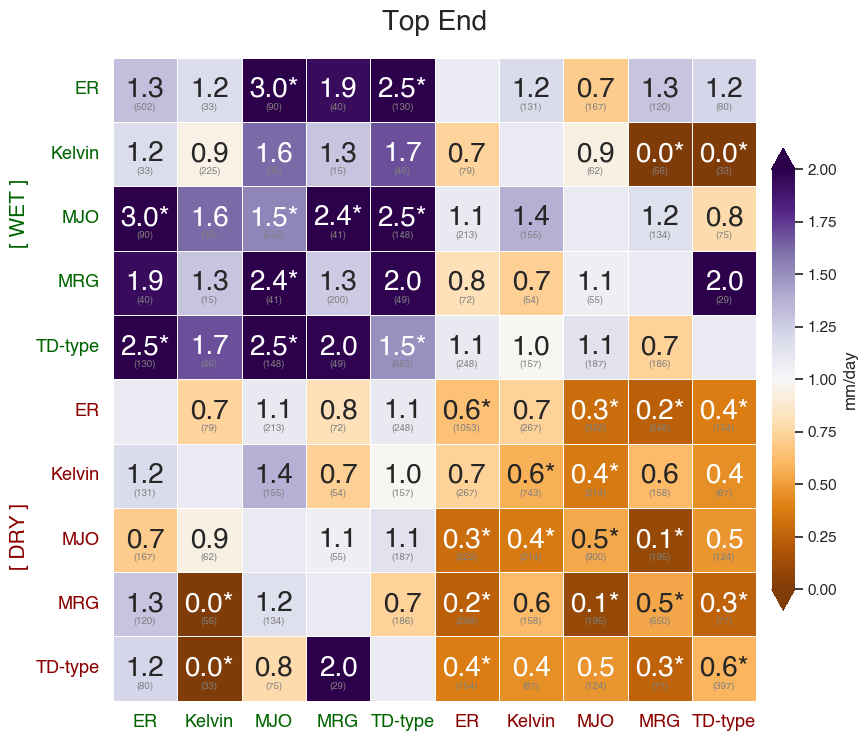

In [24]:
fig = plt.figure(figsize = [10, 10])
g = sns.heatmap(x,vmin=0,vmax=2, 
                 annot = x_sig, 
                 annot_kws={'fontsize':20,'fontweight':1000,'va':'bottom'},
                 fmt='', 
                 linewidths = .5,
                 cmap = plt.cm.get_cmap('PuOr'), cbar_kws={
                     'label': 'mm/day', 'shrink': 0.6, 'pad':0.02, 'extend':'both'},
                square=True,
               
               )


h = sns.heatmap(n, 
                 annot = n_label, 
                 annot_kws={'fontsize':7,'fontweight':10,'va':'top','color':'grey',
                            },
                 fmt='', 
                 linewidths = .5,
#                 cmap = "white",
                alpha = 0.0,
                cbar=False,
                square=True,
               
               )

import matplotlib
for t in h.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(0., 0.2,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )


g.tick_params(axis='x', colors='darkgreen')
g.tick_params(axis='y', colors='darkgreen')

for label in enumerate(g.xaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    if label[0]>4:
        label[1].set_color("darkred")
  
for label in enumerate(g.yaxis.get_ticklabels()):
    label[1].set_fontsize(13)
    label[1].set_rotation(-360)
#     print(label[0])
    if label[0]>4:
        label[1].set_color("darkred")

g.text(-1.6,2.9,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
g.text(-1.6,7.9,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")

g.set_title("Top End", fontsize=20, pad=20)

In [25]:
droploc = x.columns.get_loc("Kelvin")
idrop = [i for i, x in enumerate(droploc) if x]
idrop

[1, 6]

In [26]:

if seas=='mam':
    th = 16.36
    seasname = "SHAutumn"
elif seas=='djf':
    th = 28.11
    seasname = "SHSummer"

Text(0.5, 1.0, 'Queensland East Coast')

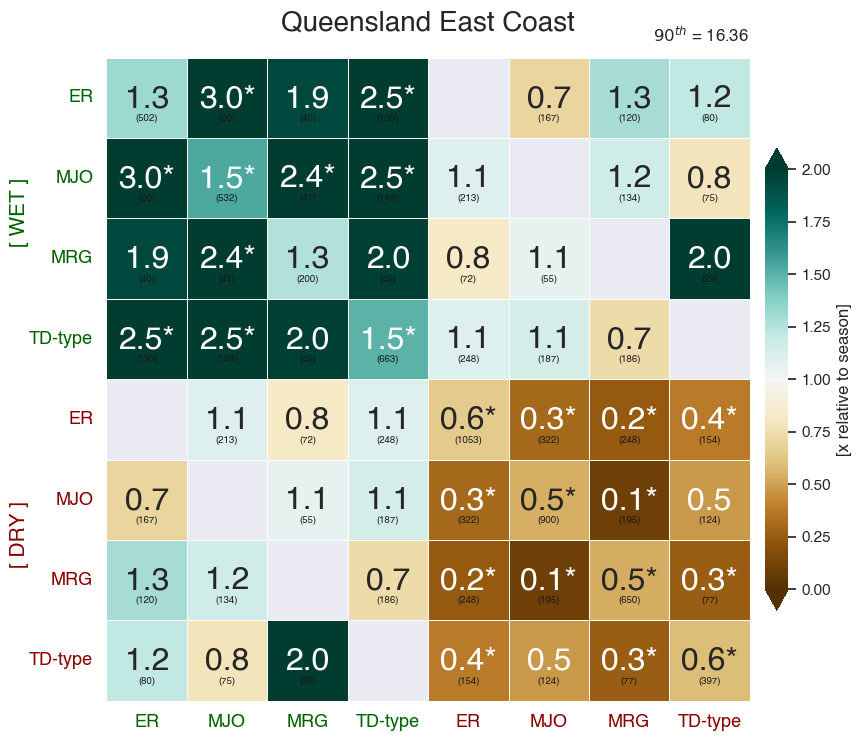

In [27]:
x2 = x.drop(x.columns[idrop], axis=1)
x2 = x2.drop(x.index[idrop])

x_sig2 = x_sig.drop(x_sig.columns[idrop], axis=1)
x_sig2 = x_sig2.drop(x_sig.index[idrop])


n_label2 = n_label.drop(n_label.columns[idrop], axis=1)
n_label2 = n_label2.drop(n_label.index[idrop])



fig = plt.figure(figsize = [10, 10])
g = sns.heatmap(x2,vmin=0,vmax=2, 
                 annot = x_sig2, 
                 annot_kws={'fontsize':23,'fontweight':1000,'va':'bottom'},
                 fmt='', 
                 linewidths = .5,
                 cmap = plt.cm.get_cmap('BrBG'), cbar_kws={
                     'label': '[x relative to season]', 'shrink': 0.6, 'pad':0.02, 
                     'extend':'both'},
                square=True,
               
               )


h = sns.heatmap(x2, 
                 annot = n_label2, 
                 annot_kws={'fontsize':7,'fontweight':10,'va':'top','color':'k',
                            },
                 fmt='', 
                 linewidths = .5,
#                 cmap = "white",
                alpha = 0.0,
                cbar=False,
                square=True,
               
               )

import matplotlib
for t in h.texts:
    trans = t.get_transform()
    offs = matplotlib.transforms.ScaledTranslation(0., 0.2,
                    matplotlib.transforms.IdentityTransform())
    t.set_transform( offs + trans )


g.tick_params(axis='x', colors='darkgreen')
g.tick_params(axis='y', colors='darkgreen')

if seas=='djf':

    for label in enumerate(g.xaxis.get_ticklabels()):
        label[1].set_fontsize(13)
        if label[0]>3:
            label[1].set_color("darkred")

    for label in enumerate(g.yaxis.get_ticklabels()):
        label[1].set_fontsize(13)
        label[1].set_rotation(-360)
    #     print(label[0])
        if label[0]>3:
            label[1].set_color("darkred")

    g.text(-1.2,2.3,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
    g.text(-1.2,6.3,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")
    g.text(6.8, -0.2, "$90^{th}$ = "+str(th), bbox=dict(facecolor='white', alpha=0.5))
    
    #     for label in enumerate(g.xaxis.get_ticklabels()):
#         label[1].set_fontsize(13)
#         if label[0]>2:
#             label[1].set_color("darkred")

#     for label in enumerate(g.yaxis.get_ticklabels()):
#         label[1].set_fontsize(13)
#         label[1].set_rotation(-360)
#     #     print(label[0])
#         if label[0]>2:
#             label[1].set_color("darkred")

#     g.text(-1.2,1.8,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
#     g.text(-1.2,5.2,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")
#     g.text(6.8, -0.2, "$90^{th}$ = "+str(th), bbox=dict(facecolor='white', alpha=0.5))

elif seas=='mam':
    
    for label in enumerate(g.xaxis.get_ticklabels()):
        label[1].set_fontsize(13)
        if label[0]>3:
            label[1].set_color("darkred")

    for label in enumerate(g.yaxis.get_ticklabels()):
        label[1].set_fontsize(13)
        label[1].set_rotation(-360)
    #     print(label[0])
        if label[0]>3:
            label[1].set_color("darkred")

    g.text(-1.2,2.3,"[ WET ]",fontsize=15,rotation=90,color="darkgreen",weight="extra bold")
    g.text(-1.2,6.3,"[ DRY ]",fontsize=15,rotation=90,color="darkred",weight="extra bold")
    g.text(6.8, -0.2, "$90^{th}$ = "+str(th), bbox=dict(facecolor='white', alpha=0.5))

g.set_title("Queensland East Coast", fontsize=20, pad=20)

In [28]:
x.columns
# flights_piv.columns

Index(['ER', 'Kelvin', 'MJO', 'MRG', 'TD-type', 'ER', 'Kelvin', 'MJO', 'MRG',
       'TD-type'],
      dtype='object')

In [29]:
fig.savefig(diro+"combined_ext_EC."+seas+".png",dpi=300)
fig.savefig(diro+"combined_ext_EC."+seas+".eps", dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
